In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import os
import re
import random
from keras.models import model_from_json, load_model
from keras import optimizers
from keras.callbacks import TensorBoard
import sys
import matplotlib.pyplot as plt
import json

Using TensorFlow backend.


In [2]:
TRAIN_FILES_DIR = './train_files/'
CSV_FILE_PATH = './small_train_labels.csv'
UNIFORM_IMAGE_SIZE = (1000, 1000)
NUMBER_OF_GENRES = 8
EPOCHS = 20
BATCH_SIZE = 10
LEARNING_RATE = 0.01
START = 400
FINISH = 500

In [3]:
# Full Model
model = load_model('long-frame-whole-model.h5')

model.summary()

W0717 02:54:50.352434 139763659806464 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 02:54:50.372291 139763659806464 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 02:54:50.389347 139763659806464 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 02:54:50.407022 139763659806464 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 02:54:50.408252 139763659806464 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1000, 1000, 2)     16002     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 200, 200, 2)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 4)       8004      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 4)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 40, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
__________

In [3]:
json_file = open('long-frame-model.json')

model = model_from_json(json_file.read())
model.load_weights('long-frame-model.h5')

model.compile(optimizer=optimizers.Adadelta(lr=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0716 21:35:16.045390 139887354853120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 21:35:16.064756 139887354853120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 21:35:16.082507 139887354853120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 21:35:16.100969 139887354853120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 21:35:16.101840 139887354853120 deprecation_wrap

In [4]:
csv_file = pd.read_csv(CSV_FILE_PATH)
all_genres = csv_file['genre'].unique()
genre_to_index = {genre: index for index, genre in enumerate(all_genres)}

In [5]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [6]:
def build_train_and_test_data():
  train_data = []
  train_labels = []

  list_of_files = os.listdir(TRAIN_FILES_DIR)[START:FINISH]
  for file_index, file in enumerate(list_of_files):
    raw_image = Image.open(TRAIN_FILES_DIR + file)
    resized_image = raw_image.resize(UNIFORM_IMAGE_SIZE)
    image_tensor = np.asarray(resized_image)
    train_data.append(image_tensor)

    file_as_str_number = re.sub('([a-z])|(\.)', '', file)
    label_name = csv_file[csv_file['track_id'] == int(file_as_str_number)]['genre'].values[0]
    train_labels.append(genre_to_index[label_name])
  return (
    np.array(train_data).astype(np.float32),
    np.array(train_labels, np.int32)
  )

In [7]:
train_data, train_labels = build_train_and_test_data()
train_data /= 255

dummy_labels = np.zeros((len(train_labels), NUMBER_OF_GENRES), np.float32)

for index, label in enumerate(train_labels):
  dummy_labels[index][label] = 1


In [8]:
history = model.fit(
  train_data,
  dummy_labels,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=0.2,
  verbose=1
)

Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 96s 1s/step - loss: 2.0201 - acc: 0.2000 - val_loss: 2.1145 - val_acc: 0.3500
Epoch 2/20
80/80 [==============================] - 73s 909ms/step - loss: 1.9489 - acc: 0.2750 - val_loss: 2.0831 - val_acc: 0.1000
Epoch 3/20
80/80 [==============================] - 73s 909ms/step - loss: 1.8899 - acc: 0.2875 - val_loss: 2.1005 - val_acc: 0.1000
Epoch 4/20
80/80 [==============================] - 73s 910ms/step - loss: 1.8680 - acc: 0.3500 - val_loss: 2.1117 - val_acc: 0.1500
Epoch 5/20
80/80 [==============================] - 73s 908ms/step - loss: 1.8882 - acc: 0.2375 - val_loss: 2.1869 - val_acc: 0.3000
Epoch 6/20
80/80 [==============================] - 73s 909ms/step - loss: 1.8454 - acc: 0.2875 - val_loss: 2.0743 - val_acc: 0.1500
Epoch 7/20
80/80 [==============================] - 73s 910ms/step - loss: 1.7888 - acc: 0.2750 - val_loss: 2.1325 - val_acc: 0.2000
Epoch 8/20
80/80 [==========

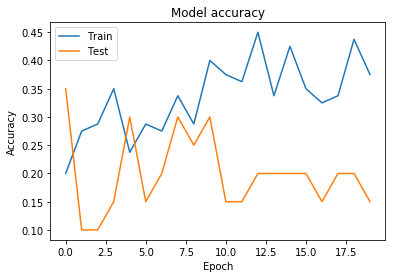

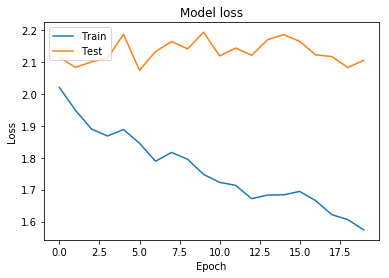

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# serialize model to JSON
model_json = model.to_json()
with open("re_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("re_model.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
# Save whole model
model.save('long-frame-whole-model.h5')

In [11]:
json_history = json.dumps(history.history)

In [13]:
with open('./long-frame-json/whole-model/history-'+ str(START) +'-'+ str(FINISH) +'.json', 'w') as file:
    json.dump(json_history, file)